# Assignment 4

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

2024-09-29 17:32:08.042568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 17:32:08.161017: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 17:32:08.187252: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 17:32:08.368859: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-29 17:32:10.005732: W tensorflow/compiler/tf2

---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [2]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [3]:
# YOUR CODE HERE

# Print the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

# Print the types of the datasets
print("Type of X_train:", type(X_train))
print("Type of Y_train:", type(Y_train))
print("Type of X_test:", type(X_test))
print("Type of Y_test:", type(Y_test))

#2- Define a list of strings of class names
# Class names for the Fashion MNIST dataset
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print the label names to verify
print("Label names:", label_names)

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)
Type of X_train: <class 'numpy.ndarray'>
Type of Y_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Type of Y_test: <class 'numpy.ndarray'>
Label names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


- X_train.shape, Y_train.shape gives the shape of the training data and labels (60000, 28, 28); meaning 60,000 samples in the training set and 60,000 labels corresponding to the images in the training set. Each sample is a 28x28 in X_train is a grayscale image of a fashion item. 
- X_test.shape, Y_test.shape gives the shape of the test data and each test labels corresponding to the test data respectively. 10,000 labels corresponding to the 10,000 images in the test set.

### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above). 

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

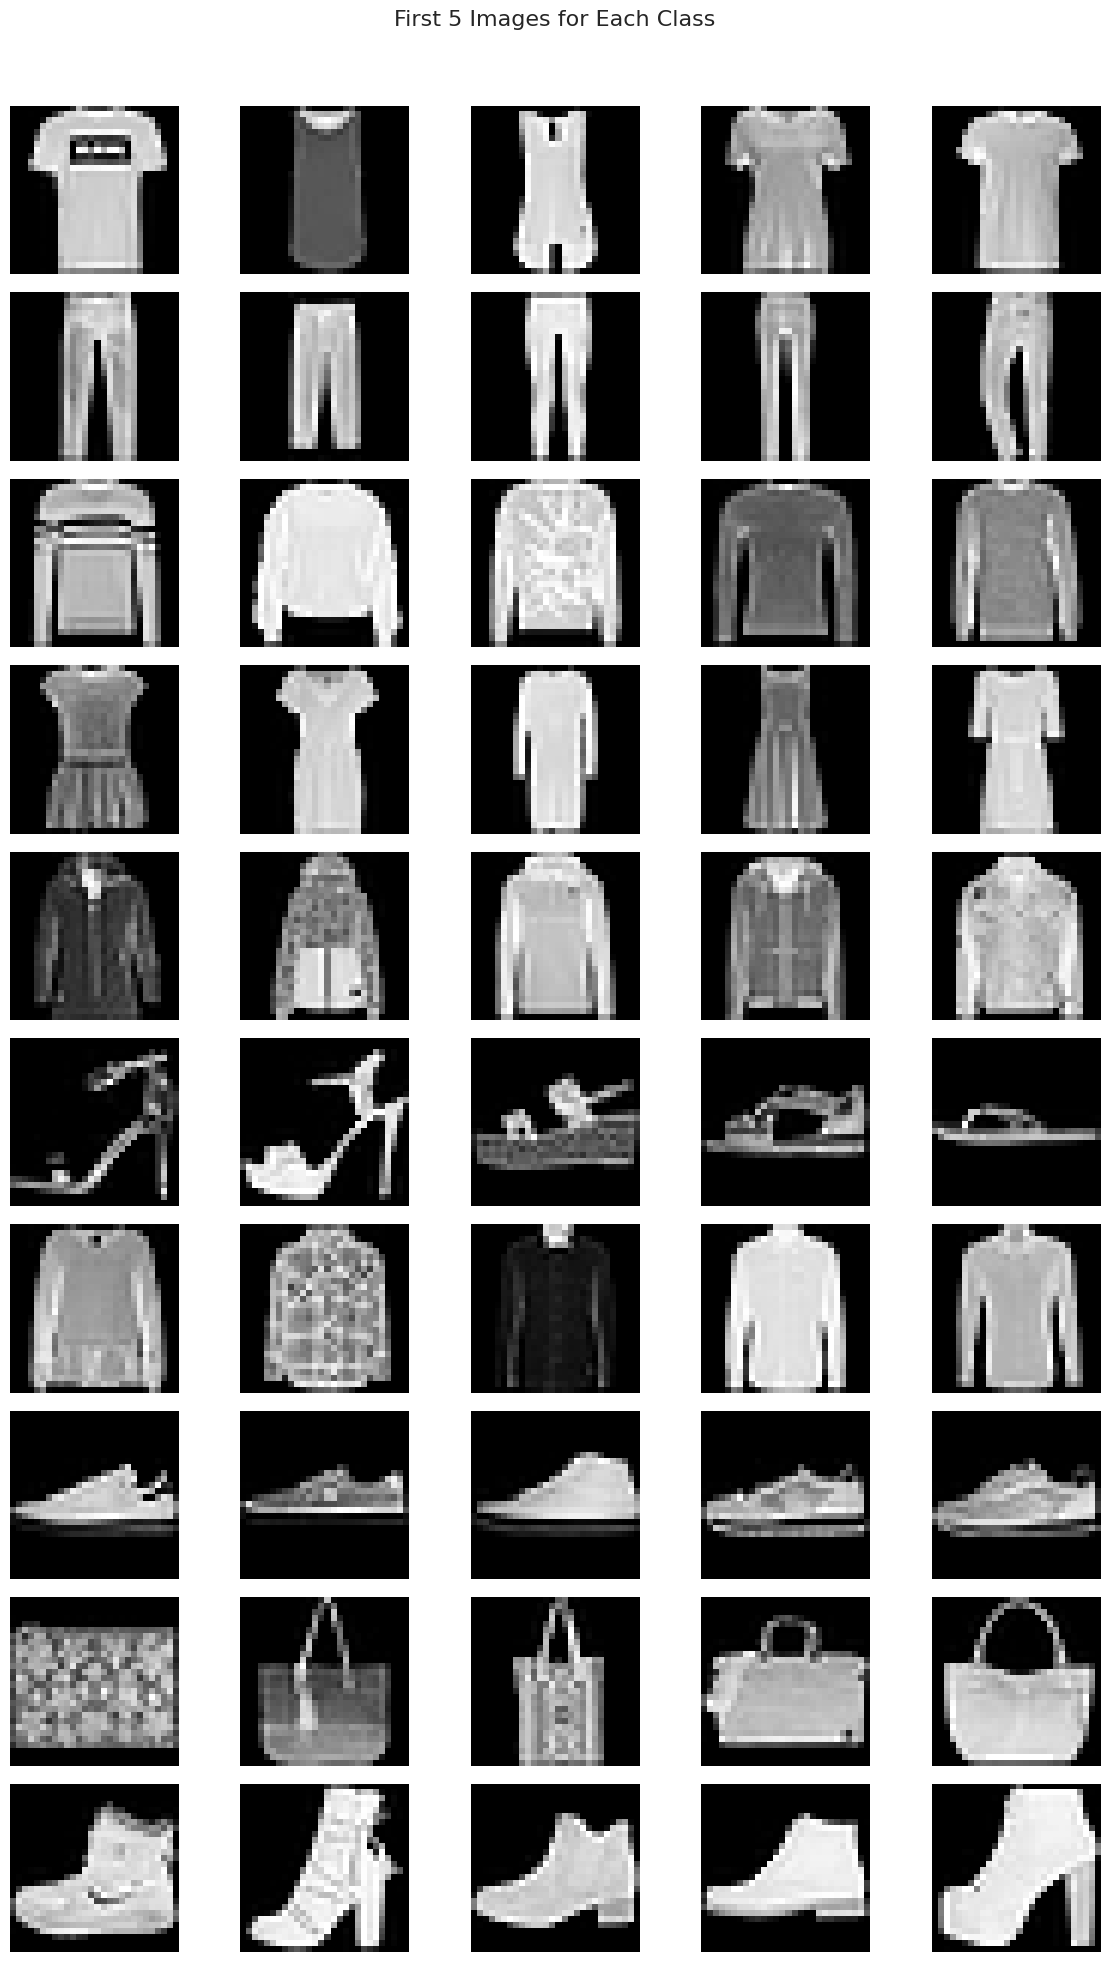

Minimum pixel value in X_train: 0
Maximum pixel value in X_train: 255


In [4]:
# YOUR CODE HERE

# Define a grid size: 10 rows (for each class) and 5 columns (5 images per class)
fig, axes = plt.subplots(10, 5, figsize=(12, 20))
fig.suptitle("First 5 Images for Each Class", fontsize=16)

# Loop through each class
for i in range(10):
    # Find the first 5 images for the current class in Y_train
    class_indices = np.where(Y_train == i)[0][:5]  # Getting indices of the first 5 images for the class

    # Loop through the first 5 images for the class
    for j in range(5):
        # Get the index of the image
        img_index = class_indices[j]
        # Display the image in the correct subplot
        axes[i, j].imshow(X_train[img_index], cmap='gray')
        axes[i, j].axis('off')  # Hide the axis

    # Add the class name as the label on the left of each row
    axes[i, 0].set_ylabel(label_names[i], fontsize=12, rotation=0, labelpad=40, va='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Calculate the minimum and maximum pixel values in X_train
min_pixel_value = np.min(X_train)
max_pixel_value = np.max(X_train)

print("Minimum pixel value in X_train:", min_pixel_value)
print("Maximum pixel value in X_train:", max_pixel_value)

---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms. 

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [5]:
# YOUR CODE HERE

# 1. Normalizing the pixel values between 0 and 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. Flatten the 28x28 images into 1D arrays of size 784
X_train = X_train.reshape(X_train.shape[0], 28*28)  # Reshaping to (number of images, 784)
X_test = X_test.reshape(X_test.shape[0], 28*28)  # Reshaping to (number of images, 784)

# 3. Print the shapes of X_train and X_test after reshaping
print("Shape of X_train after flattening:", X_train.shape)
print("Shape of X_test after flattening:", X_test.shape)

Shape of X_train after flattening: (60000, 784)
Shape of X_test after flattening: (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows: 
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [6]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# YOUR CODE HERE
# Overwrite Y_train and Y_test for binary classification (sneaker or not)
Y_train[Y_train == 7] = 1  # Set 1 for sneakers (class 7)
Y_train[Y_train != 1] = 0  # Set 0 for all other classes

Y_test[Y_test == 7] = 1    # Set 1 for sneakers (class 7)
Y_test[Y_test != 1] = 0    # Set 0 for all other classes

# Print the first 10 values of Y_train and Y_test to verify
print("First 10 values of Y_train:", Y_train[:10])
print("First 10 values of Y_test:", Y_test[:10])

First 10 values of Y_train: [0 0 0 0 0 0 1 0 0 0]
First 10 values of Y_test: [0 0 1 1 0 1 0 0 0 1]


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. All the other arguments of the method are set to default values. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [7]:
# YOUR CODE HERE
# 1. Use train_test_split to retain 20% of the training data for validation
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=1234)

# 2. Print the shape of each array
print("Shape of X_train_mini:", X_train_mini.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train_mini:", Y_train_mini.shape)
print("Shape of Y_val:", Y_val.shape)

Shape of X_train_mini: (48000, 784)
Shape of X_val: (12000, 784)
Shape of Y_train_mini: (48000,)
Shape of Y_val: (12000,)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. 

1. Use [integer array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing) to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [8]:
np.random.seed(0)
# YOUR CODE HERE

# Generate a list of shuffled indices
shuffled_indices = np.random.permutation(X_train_mini.shape[0])

# Using integer array indexing to shuffle X_train_mini and Y_train_mini
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]

# Verify that the arrays are shuffled by printing a few samples.
print("First 5 shuffled X_train_mini samples:", X_train_mini[:5])
print("First 5 shuffled Y_train_mini labels:", Y_train_mini[:5])

First 5 shuffled X_train_mini samples: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.78039217 0.5686275  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
First 5 shuffled Y_train_mini labels: [0 1 1 0 0]


---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

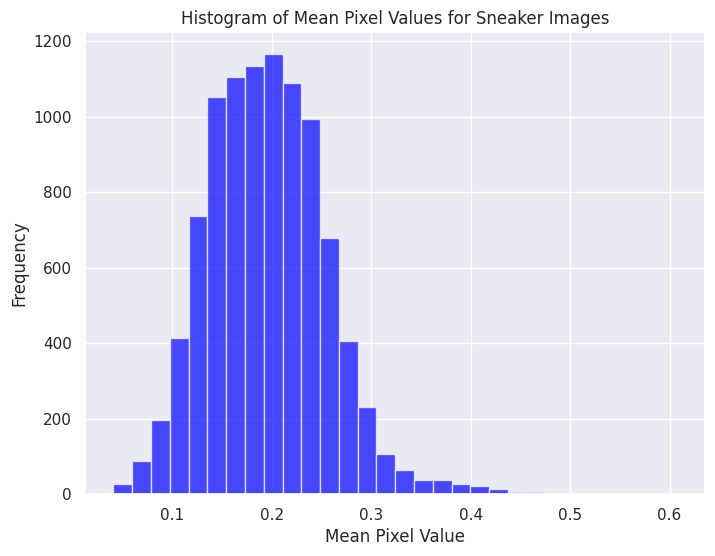

Mean pixel value across all sneaker images: 0.19565322


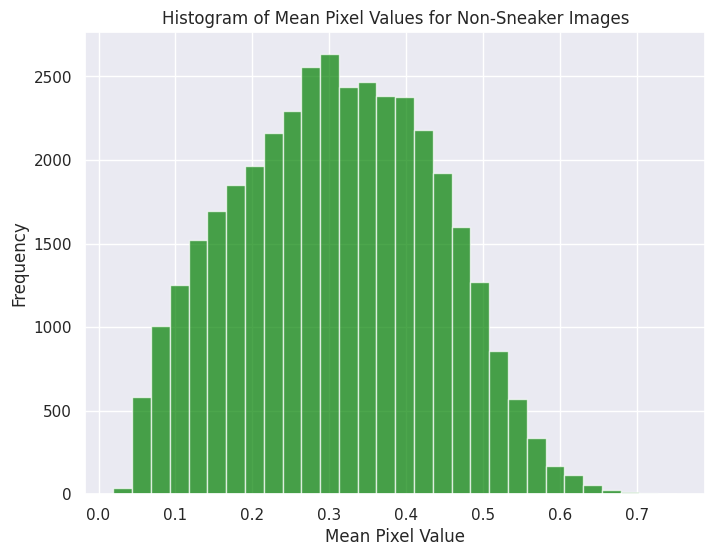

Mean pixel value across all non-sneaker images: 0.3086424


In [9]:
# YOUR CODE HERE
# 1. Identify sneaker images (Y_train_mini == 1)
sneaker_indices = np.where(Y_train_mini == 1)[0]
sneaker_images = X_train_mini[sneaker_indices]

# 1b. Calculate the mean pixel value for each sneaker image
sneaker_means = np.mean(sneaker_images, axis=1)

# 1c. Visualize the pixel values of sneaker images using a histogram
plt.figure(figsize=(8, 6))
plt.hist(sneaker_means, bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Mean Pixel Values for Sneaker Images")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 1d. Print the mean pixel value across all sneaker images
mean_sneaker_value = np.mean(sneaker_means)
print("Mean pixel value across all sneaker images:", mean_sneaker_value)

# 2. Identify non-sneaker images (Y_train_mini == 0)
non_sneaker_indices = np.where(Y_train_mini == 0)[0]
non_sneaker_images = X_train_mini[non_sneaker_indices]

# 2b. Calculate the mean pixel value for each non-sneaker image
non_sneaker_means = np.mean(non_sneaker_images, axis=1)

# 2c. Visualize the pixel values of non-sneaker images using a histogram
plt.figure(figsize=(8, 6))
plt.hist(non_sneaker_means, bins=30, color='green', alpha=0.7)
plt.title("Histogram of Mean Pixel Values for Non-Sneaker Images")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 2d. Print the mean pixel value across all non-sneaker images
mean_non_sneaker_value = np.mean(non_sneaker_means)
print("Mean pixel value across all non-sneaker images:", mean_non_sneaker_value)

The histogram for the mean pixel values of sneaker images shows that most values are clustered between approximately 0.15 and 0.25, with the peak centered around 0.2. This suggests that sneaker images generally have lower mean pixel intensity values, indicating that they are overall darker in appearance.

The histogram for non-sneaker images has a broader range, with the mean pixel values mostly falling between 0.2 and 0.35. The peak is around 0.3. This shows non-sneaker images appear to have a higher average pixel intensity than sneaker images, indicating that they are generally lighter.

Based on the historgrams, some separation occurs between the two. Sneaker images tend to have lower mean pixel values, while non-sneaker images tend to have higher mean pixel values. This difference in pixel intensity could potentially be useful in distinguishing between sneakers and non-sneakers. However, the overlap between the two distributions suggests that pixel values alone are not fully sufficient for perfect classification.

---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini?
2. What is the number of non-sneaker images in Y_train_mini?
3. What is the majority class in Y_train_mini?
4. What is the accuracy of a majority class classifier for Y_train_mini?
5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helpers.ipynb``.

In [10]:
# YOUR CODE HERE
# 1. number of sneaker images in Y_train_mini
num_sneakers = np.sum(Y_train_mini == 1)
print("Number of sneaker images in Y_train_mini:", num_sneakers)

# 2. number of non sneaker images
num_non_sneakers = np.sum(Y_train_mini == 0)
print("Number of non-sneaker images in Y_train_mini:", num_non_sneakers)

# 3. finding the majority class
if num_sneakers > num_non_sneakers:
    majority_class = 1
else:
    majority_class = 0

print("Majority class in Y_train_mini:", majority_class)

# 4. finding accuracy for majority class classifier
accuracy_majority = np.mean(Y_train_mini == majority_class)
print("Accuracy of majority class classifier for Y_train_mini:", accuracy_majority)

# 5. log loss function
# Function to compute binary cross-entropy
def log_loss(y_true, y_pred_prob):
    epsilon = 1e-15  # clipping predictions to a very small value To avoid log(0)
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)  # clip predictions
    loss = -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
    return loss

# 5a. Evaluate the baseline with predicted probability of 0.1
y_pred_prob_baseline = 0.1  # Given constant predicted probability
y_train_pred_prob = np.full_like(Y_train_mini, y_pred_prob_baseline, dtype=np.float32)
y_val_pred_prob = np.full_like(Y_val, y_pred_prob_baseline, dtype=np.float32)

# Calculate Log Loss for training and validation sets
train_log_loss = log_loss(Y_train_mini, y_train_pred_prob)
val_log_loss = log_loss(Y_val, y_val_pred_prob)

print("Log Loss on Y_train_mini:", train_log_loss)
print("Log Loss on Y_val:", val_log_loss)

Number of sneaker images in Y_train_mini: 9649
Number of non-sneaker images in Y_train_mini: 38351
Majority class in Y_train_mini: 0
Accuracy of majority class classifier for Y_train_mini: 0.7989791666666667
Log Loss on Y_train_mini: 0.5470485
Log Loss on Y_val: 0.5358335


### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;
2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.
3. Generate a plot (for the mini training and validation data) with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

In [11]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units= 1,        # output dim
      input_shape= (num_features,),  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation= "sigmoid",
      kernel_initializer= tf.keras.initializers.Ones(),   # initialize params to 1
      bias_initializer= tf.keras.initializers.Ones(),     # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',  # Binary cross-entropy loss
                  metrics=['accuracy'])        # Using accuracy as the evaluation metric

    
  return model

/home/vanel/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2024 - loss: 191.5192 - val_accuracy: 0.1959 - val_loss: 185.2456
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2024 - loss: 181.2126 - val_accuracy: 0.1959 - val_loss: 174.8570
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2024 - loss: 170.9058 - val_accuracy: 0.1959 - val_loss: 164.4683
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2024 - loss: 160.5992 - val_accuracy: 0.1959 - val_loss: 154.0798
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2024 - loss: 150.2925 - val_accuracy: 0.1959 - val_loss: 143.6911


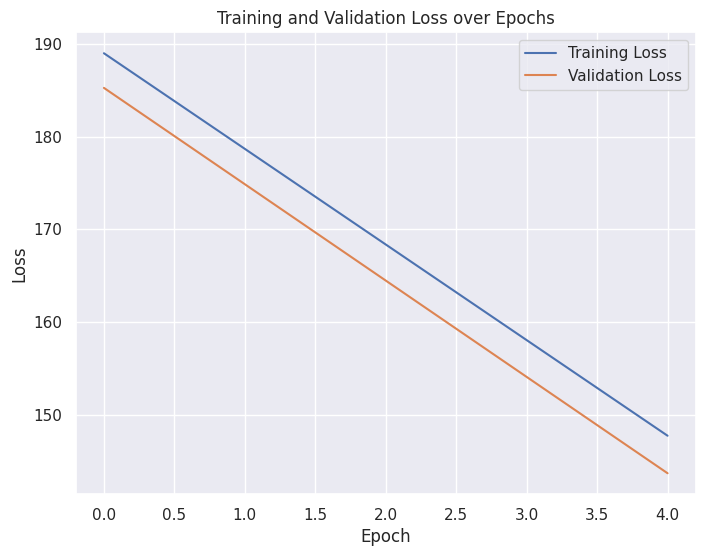

In [12]:
tf.random.set_seed(0)
# 2. Build and compile model
# YOUR CODE HERE
num_features = 784 # since images are flattened into 1D arrays of size 784
learning_rate = 0.0001

# 3. Fit the model
# YOUR CODE HERE
model_tf = build_model(num_features=num_features, learning_rate=learning_rate)

# Training the model
num_epochs = 5
batch_size = 32

# Train the model and store the history to track the loss and accuracy
history = model_tf.fit(X_train_mini, Y_train_mini,
                       epochs=num_epochs,
                       batch_size=batch_size,
                       validation_data=(X_val, Y_val),
                       verbose=1)

# Plotting the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the **learning rate** and **number of epochs** hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for these hyperparameters. Hint: you can manually test different hyperparameter values or you can use the [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner). If you decide to work with the Keras Tuner, define a new model building function named <span style="color:chocolate">build_model_tuner()</span>.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (this should include the bias term);
3. The loss at the final epoch on both the mini training and validation datasets;
4. The percentage difference between the losses observed on the mini training and validation datasets.
5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model? 


Please note that we will consider 'optimal model configuration' any last-epoch training and validation loss that is below 0.08.

In [30]:
# YOUR CODE HERE

#1. Selecting the best parameters
# Trying different values for learning_rate and epochs
learning_rates = [0.1]
epochs_options = [15, 30]

# Placeholder for best configuration
best_model = None
best_train_loss = None
best_val_loss = None
best_history = None

for lr in learning_rates:
    for num_epochs in epochs_options:
        print(f"Training model with learning_rate={lr} and epochs={num_epochs}")
        model_tf = build_model(num_features, lr)
        history = model_tf.fit(X_train_mini, Y_train_mini,
                               epochs=num_epochs,
                               batch_size=32,
                               validation_data=(X_val, Y_val),
                               verbose=1)
        
        # Get final training and validation loss
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]
        
        # Check if this configuration has the lowest validation loss
        if best_val_loss is None or final_val_loss < best_val_loss:
            best_model = model_tf
            best_train_loss = final_train_loss
            best_val_loss = final_val_loss
            best_history = history

# Print the best training configuration
print(f"Best model: learning_rate={lr}, epochs={num_epochs}")
print(f"Training loss: {best_train_loss}")
print(f"Validation loss: {best_val_loss}")

#2. The first five learned parameters of the model
weights, bias = best_model.layers[0].get_weights()
print("First five learned parameters (weights):", weights.flatten()[:5])
print("Bias term:", bias) #(including the bias term)


#3. The loss at the final epoch on both the mini training and validation datasets;
print("Final Training Loss:", best_train_loss)
print("Final Validation Loss:", best_val_loss)

# 4. The percentage difference between the losses observed on the mini training and validation datasets.
# Percentage difference between training and validation loss
percentage_difference = 100 * abs(best_val_loss - best_train_loss) / best_train_loss
print(f"Percentage difference between training and validation loss: {percentage_difference:.2f}%")

# 5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss.
baseline_train_loss = train_log_loss #0.5470485
baseline_val_loss = val_log_loss #0.5358335

print(f"Improvement over baseline training loss: {baseline_train_loss - best_train_loss:.6f}")
print(f"Improvement over baseline validation loss: {baseline_val_loss - best_val_loss:.6f}")

if final_train_loss < baseline_train_loss and best_val_loss < baseline_val_loss:
    print("The TensorFlow model demonstrates an improvement over the baseline.")
else:
    print("The TensorFlow model does not demonstrate an improvement over the baseline.")

Training model with learning_rate=0.1 and epochs=15
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8205 - loss: 11.0725 - val_accuracy: 0.9561 - val_loss: 0.1442
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9593 - loss: 0.1395 - val_accuracy: 0.9631 - val_loss: 0.1083
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9670 - loss: 0.1101 - val_accuracy: 0.9663 - val_loss: 0.0960
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9686 - loss: 0.0986 - val_accuracy: 0.9678 - val_loss: 0.0904
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9704 - loss: 0.0927 - val_accuracy: 0.9684 - val_loss: 0.0875
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9710 - loss: 0.0890 - val_accuracy: 0.9693 - val_loss: 0.0856
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9716 - loss: 0.0866 - val_accuracy: 0.9702 - val_loss: 0.0844
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━

The TensorFlow model demonstrates a significant improvement over the baseline, with a training loss reduction of 0.4751 and a validation loss reduction of 0.4563 compared to the baseline model. These improvements indicate that the TensorFlow model has learned more effective patterns from the data, resulting in better generalization to unseen data while maintaining a low difference between training and validation losses. Therefore, the model successfully outperforms the baseline.

---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations.

In [32]:
# YOUR CODE HERE
# Calculate accuracy on the mini training dataset
train_loss, train_accuracy = best_model.evaluate(X_train_mini, Y_train_mini, verbose=1)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculating test accuracy
test_loss, test_accuracy = best_model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9765 - loss: 0.0704
Training Accuracy: 97.65%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9731 - loss: 0.0846
Test Accuracy: 97.20%


The accuracy on the training dataset is 97.65%, and the accuracy on the test dataset is 97.20%. The small difference of 0.45% between training and test accuracy indicates that the model is not overfitting, and it generalizes well to unseen data.

### <span style="color:chocolate">Exercise 12:</span> Fairness evaluation (10 points)

1. Generate and visualize the confusion matrix on the test dataset using a probability threshold of 0.5. Additionally, print the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN). Hint: you can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras, and then the <span style="color:chocolate">confusion_matrix()</span>, <span style="color:chocolate">ConfusionMatrixDisplay()</span> methods available in sklearn.metrics;

2. Compute subgroup accuracy, separately for the sneaker and non-sneaker classes, on the test dataset using a probability threshold of 0.5. Reflect on any observed accuracy differences (potential lack of fairness) between the two classes.

3. Does the model demonstrate strong subgroup generalization capabilities? Provide an explanation based on your accuracy observations.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


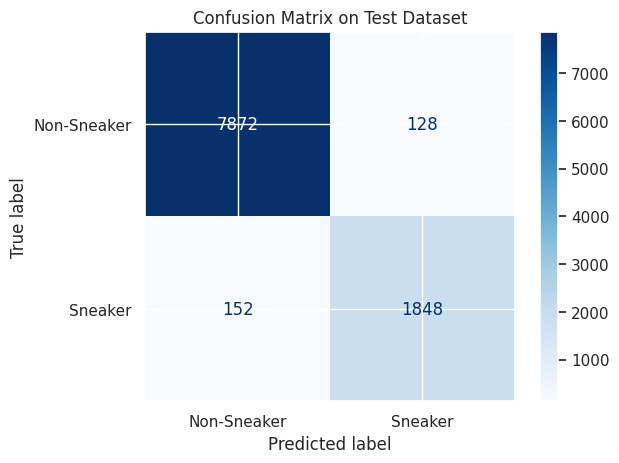

True Positives (TP): 1848
False Negatives (FN): 152
False Positives (FP): 128
True Negatives (TN): 7872


In [34]:
# YOUR CODE HERE

# 1: Predict probabilities on the test set
y_pred_prob = best_model.predict(X_test)

# Convert predicted probabilities into binary predictions with a threshold of 0.5
y_pred_class = (y_pred_prob >= 0.5).astype(int)

# 2: Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred_class)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Sneaker', 'Sneaker'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Dataset")
plt.show()

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Print TP, FN, FP, TN
print(f"True Positives (TP): {TP}")
print(f"False Negatives (FN): {FN}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")

Based on the confusion matrix and accuracy metrics, the model demonstrates strong generalization capabilities across both the sneaker and non-sneaker classes. The True Positive (TP) count of 1848 and the relatively low False Negative (FN) count of 152 indicate that the model is highly effective at correctly identifying sneakers. Similarly, the True Negative (TN) count of 7872 and the low False Positive (FP) count of 128 show that the model is also accurate in classifying non-sneaker images.

The subgroup accuracy calculations further highlight this generalization: 
- sneakers achieve an accuracy of TP /(TP + FN) => 1848 / (1848 + 152) ​≈ 92.4%, 
- non-sneakers achieve an accuracy of TN / (TN+FP) => 7872 / (7872 + 128) ≈ 98.4%

Although the model is slightly better at predicting non-sneakers than sneakers, both classes are predicted with high accuracy, and the model performs well overall with minimal bias toward either class. This suggests that the model generalizes effectively across both categories, showing no significant fairness issues.

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Is it possible to enhance the prediction accuracy for the sneaker class by performing the following steps?

1. Implement data balancing techniques, such as oversampling or undersampling, to equalize the representation of both classes.
2. After balancing the data, retrain the model on the balanced dataset.
3. Evaluate the model's performance, particularly focusing on the accuracy achieved for the sneaker class.